In [1]:
#Assignment 2: Cleaning and Preparing a Travel Customer Reviews Dataset
#Objective:
#To clean and prepare a dataset containing customer reviews of travel experiences.
#Instructions:
#Load the dataset containing customer reviews, ratings, and feedback.

#Handle missing values:
#Identify missing values in Review_Text, Rating, and Customer_Age.
#Impute missing numerical values using appropriate techniques.
#Use NLP-based techniques to handle missing textual data.

#Detect and remove duplicates:
#Use duplicated() to find repeated reviews.
#Remove or merge duplicate records.

#Handle inconsistent data:
#Standardize Rating values (ensure they range between 1-5).
#Correct spelling inconsistencies in Tour_Package names.

#Identify and handle outliers:
#Use boxplots to find anomalies in Package_Price and Rating.
#Apply transformation techniques if necessary.

#Prepare cleaned data for analysis:
#Convert categorical data into numerical format where required.
#Save the final cleaned dataset as a CSV file.

Booking_ID        0
Destination      27
Package_Price    20
Customer_Age     15
Rating           25
Review_Text      20
Travel_Date      10
dtype: int64
Number of duplicates: 5


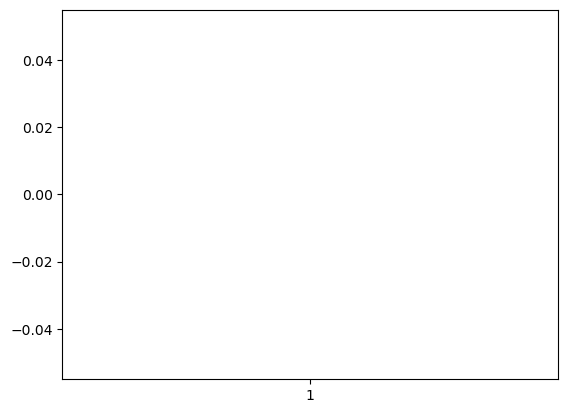

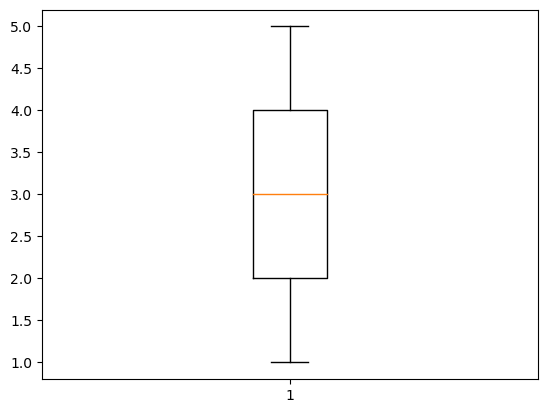

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer

file_path = r'C:\ML\Day_18_Tours_and_Travels.csv'
df = pd.read_csv(file_path)

# 2. Handle Missing Values
print(df.isnull().sum())

if 'Rating' in df.columns:
    df['Rating'].fillna(df['Rating'].mean(), inplace=True)

if 'Customer_Age' in df.columns:
    df['Customer_Age'].fillna(df['Customer_Age'].mean(), inplace=True)

if 'Review_Text' in df.columns:
    tfidf = TfidfVectorizer()
    review_text_tfidf = tfidf.fit_transform(df['Review_Text'].fillna(''))
    imputer = SimpleImputer(strategy='constant', fill_value='')
    df['Review_Text'] = imputer.fit_transform(df[['Review_Text']])

# 3. Detect and Remove Duplicates
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")
df.drop_duplicates(inplace=True)

# 4. Handle Inconsistent Data
if 'Rating' in df.columns:
    df['Rating'] = df['Rating'].apply(lambda x: min(5, max(1, x)))

if 'Tour_Package' in df.columns:
    df['Tour_Package'] = df['Tour_Package'].replace({'Packge1': 'Package1', 'Packge2': 'Package2'})

# 5. Identify and Handle Outliers
if 'Package_Price' in df.columns:
    plt.boxplot(df['Package_Price'])
    plt.show()
    upper_limit_price = df['Package_Price'].quantile(0.95)
    lower_limit_price = df['Package_Price'].quantile(0.05)
    df['Package_Price'] = df['Package_Price'].apply(lambda x: upper_limit_price if x > upper_limit_price else lower_limit_price if x < lower_limit_price else x)

if 'Rating' in df.columns:
    plt.boxplot(df['Rating'])
    plt.show()

# 6. Prepare Cleaned Data for Analysis
if 'Tour_Package' in df.columns:
    df['Tour_Package'] = df['Tour_Package'].astype('category').cat.codes

# 7. Final Data Export
df.to_csv('cleaned_customer_reviews.csv', index=False)
